<h1> Facial Keypoints Detection </h1>

In [143]:
import pandas as pd
from pathlib import Path
data_dir = Path(r'C:\Users\VICTUS\Documents\Data-Science\.git\facial-keypoints-detection')
train_data = pd.read_csv(data_dir/'training/training.csv')
train_data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301,69.680748,64.131866,67.468893,65.80288,64.121231,...,69.229935,63.352951,65.711151,67.929319,66.867222,67.402546,66.1344,66.690732,70.965082,66.938311
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261,39.968748,34.29004,39.413452,34.7552,36.740308,...,38.575634,35.671311,38.843545,35.846552,37.356855,31.842551,38.365501,36.845221,39.853666,43.42451
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481,29.183551,29.578953,29.355961,27.47584,29.468923,...,29.407912,33.952078,32.268751,28.68782,30.750926,29.746749,30.478626,31.66642,30.543285,31.096059
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032,37.563364,33.13804,39.621717,36.1856,38.390154,...,38.34545,40.816448,37.706043,41.452484,40.115743,38.632942,39.950198,39.685042,40.772339,39.528604
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589,62.864299,57.797154,59.554951,58.65216,58.620923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


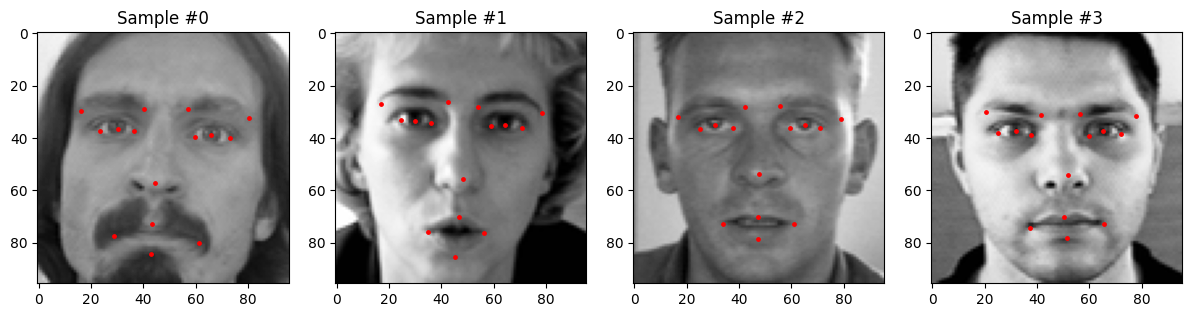

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
IMG_SIZE = 96 #image size 96 x 96 pixels

def show_keypoints(image, keypoints):
    plt.imshow(image, cmap='gray')
    if len(keypoints):
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s=24, marker='.', color='red')

def show_images(df, indexes, ncols=5, figsize=(15,10), with_keypoints=True):
    plt.figure(figsize=figsize)
    nrows = len(indexes)//ncols + 1
    for i, idx in enumerate(indexes):
        image = np.fromstring(df.loc[idx, 'Image'], sep=' ').astype(np.float32).reshape(-1, IMG_SIZE)
        if with_keypoints:
            keypoints = df.loc[idx].drop('Image').values.astype(np.float32).reshape(-1,2)
        else:
            keypoints = []
        plt.subplot(nrows, ncols, i+1)
        plt.title(f"Sample #{idx}")
        plt.tight_layout()
        show_keypoints(image, keypoints)
    plt.show()

show_images(train_data, indexes=[0,1,2,3])

In [145]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [146]:
# Cleaning Data

train_df = train_data.dropna().reset_index()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      2140 non-null   int64  
 1   left_eye_center_x          2140 non-null   float64
 2   left_eye_center_y          2140 non-null   float64
 3   right_eye_center_x         2140 non-null   float64
 4   right_eye_center_y         2140 non-null   float64
 5   left_eye_inner_corner_x    2140 non-null   float64
 6   left_eye_inner_corner_y    2140 non-null   float64
 7   left_eye_outer_corner_x    2140 non-null   float64
 8   left_eye_outer_corner_y    2140 non-null   float64
 9   right_eye_inner_corner_x   2140 non-null   float64
 10  right_eye_inner_corner_y   2140 non-null   float64
 11  right_eye_outer_corner_x   2140 non-null   float64
 12  right_eye_outer_corner_y   2140 non-null   float64
 13  left_eyebrow_inner_end_x   2140 non-null   float

<h2>Preprocessing Data </h2>

In [147]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

from torch import nn, optim
import torch.nn.functional as func

In [170]:
class FaceKeypointsDataset(Dataset):
    def __init__(self, df, train=True, transform=None):
        self.df = df
        self.train = train
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        image = np.fromstring(self.df.loc[idx, 'Image'], sep=' ').astype(np.float32).reshape(-1, IMG_SIZE)
        if self.train:
            keypoints = self.df.iloc[idx,1:-1].values.astype(np.float32)
            sample = {
                'image': image,
                'keypoints':keypoints
            }
        else:
            sample = {
                'image': image
            }
        if self.transform:
            sample = self.transform(sample)
        return sample        

<h3>  Transformations</h3>

In [190]:
class Normalize(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample.get('keypoints')
        if keypoints is not None:
            return {
                'image':  image/255., #scale to [0,1]
                'keypoints':keypoints
            }
        else:
            return {
                'image':  image/255., #scale to [0,1]
            }

    
class ToTensor(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample.get('keypoints')

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.reshape(1, IMG_SIZE, IMG_SIZE)
        image = torch.from_numpy(image)

        if keypoints is not None:
            keypoints =  torch.from_numpy(keypoints)
            return {
                'image': image,
                'keypoints':keypoints
            }
        else:
            return {
                'image': image
            }

class RandomHorizontalFlip(object):
    def __init__(self, p):
        self.p = p
        
    def __call__(self, sample):
        flip_indices = [
            (0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)
        ]
        image, keypoints = sample['image'], sample.get('keypoints')
        if np.random.random() < self.p:
            image = image[:, ::-1]
            if keypoints is not None:
                for a, b in flip_indices:
                    keypoints[a], keypoints[b] = keypoints[b], keypoints[a]
                keypoints[::2] = 96. - keypoints[::2] 
                return {
                    'image': image,
                    'keypoints':keypoints
                }
            else:
                return {
                    'image':image
                }
        if keypoints is not None:
            return {
                'image': image,
                'keypoints':keypoints
            }
        else:
            return {
                'image': image
            }

<h3>  Splitting Training data into train and validation sets </h3>

In [182]:
def prepare_train_valid_loaders(trainset, valid_size=0.2, batch_size=128):
    # Obtain training index that will be used for validation
    num_train = len(trainset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_indx, valid_indx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_indx)
    valid_sampler = SubsetRandomSampler(valid_indx)

    # prepare data loaders  
    train_loader = DataLoader(trainset, batch_size=batch_size, sampler=train_sampler)
    valid_loader = DataLoader(trainset, batch_size=batch_size, sampler=valid_sampler)
    loaders = {
        'train':train_loader,
        'valid':valid_loader
    }

    return loaders

<h3>  Construct Dataset and Dataloader</h3>

In [191]:
# define transform to augment the data

aug_transformations = transforms.Compose(
    [
        RandomHorizontalFlip(p=0.5),
        Normalize(),
        ToTensor()
    ]
)

# load training data
train_dataset = FaceKeypointsDataset(train_df, transform=aug_transformations)

# Prepare DataLoaders
batch_size = 32
valid_size = 0.3
loaders = prepare_train_valid_loaders(train_dataset, valid_size, batch_size)

<h2> Constructing CNN </h2>

In [152]:
def conv_layer(in_channels, out_channels, kernel_size=3, batch_norm=False):
    layers = []
    layers.append(nn.ReLU())
    conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, padding=1)
    layers.append(conv_layer)
    layers.append(nn.MaxPool2d(2, 2))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

In [153]:
class CNN(nn.Module):
    def __init__(self, outputs=20):
        super().__init__()
        self.conv = nn.Sequential(
            #1 * 96 * 96
            conv_layer(1, 16),
            #16 * 48 * 48
            conv_layer(16, 32),
            #32 * 24 * 24
            conv_layer(32, 64),
            #64 * 12 * 12
        )

        self.linear = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(64*12*12, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, outputs)
        )
    
    def forward(self, X):
        conv_output = self.conv(X)
        linear_input = conv_output.view(-1, 64*12*12)
        return self.linear(linear_input)

<h3>  Training Network </h3>

In [154]:

def train(loaders, model, optimizer, criterion, use_cuda, save_path='model.pt', valid_loss_min=np.Inf, n_epochs=50):
    """returns trained model"""
    train_losses = []
    valid_losses = []
    print('Started Training')    
    for epoch in range(1, n_epochs+1):
        try:
            # initialize variables to monitor training and validation loss
            train_loss = 0.0
            valid_loss = 0.0
            
            ###################
            # train the model #
            ###################
            model.train()
            for batch in loaders['train']:
                # move to GPU
                data = batch['image']
                target = batch['keypoints']
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## find the loss and update the model parameters accordingly
                ## record the average training loss, using something like
                ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                optimizer.zero_grad()            
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                train_loss = train_loss + loss.item()*data.size(0)
        except IndexError:
            continue  
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch in loaders['valid']:
            try:
                data = batch['image']
                target = batch['keypoints']
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output = model(data)
                loss = criterion(output, target)
                valid_loss = valid_loss + loss.item()*data.size(0)
            except IndexError:
                continue

        train_loss = np.sqrt(train_loss/len(loaders['train'].sampler.indices))
        valid_loss = np.sqrt(valid_loss/len(loaders['valid'].sampler.indices))
                        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss_min >= valid_loss:
            valid_loss_min = valid_loss
            print('Validation loss decreased saving model.....')
            torch.save(model.state_dict(), save_path)

    # return trained model
    return model, train_losses, valid_losses

In [155]:
model = CNN(outputs=30)
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

model, train_losses, valid_losses = train(loaders, model, optimizer, criterion, use_cuda)

Started Training


Epoch: 1 	Training Loss: 22.540334 	Validation Loss: 4.169808
Validation loss decreased saving model.....
Epoch: 2 	Training Loss: 4.432126 	Validation Loss: 3.389338
Validation loss decreased saving model.....
Epoch: 3 	Training Loss: 4.158270 	Validation Loss: 3.279808
Validation loss decreased saving model.....
Epoch: 4 	Training Loss: 4.109958 	Validation Loss: 3.233437
Validation loss decreased saving model.....
Epoch: 5 	Training Loss: 3.991375 	Validation Loss: 3.399888
Epoch: 6 	Training Loss: 3.952765 	Validation Loss: 3.838041
Epoch: 7 	Training Loss: 4.035243 	Validation Loss: 3.278135
Epoch: 8 	Training Loss: 3.831630 	Validation Loss: 3.222506
Validation loss decreased saving model.....
Epoch: 9 	Training Loss: 3.834801 	Validation Loss: 3.226312
Epoch: 10 	Training Loss: 3.777222 	Validation Loss: 3.196385
Validation loss decreased saving model.....
Epoch: 11 	Training Loss: 3.763646 	Validation Loss: 3.175911
Validation loss decreased saving model.....
Epoch: 12 	Trainin

In [167]:
def predict(data_loader, model, use_cuda):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            data = batch['image']
            if use_cuda:
                data = data.cuda()
            output = model(data).cpu().numpy()
            if i==0:
                predictions = output
            else:
                predictions = np.vstack((predictions, output))
    return predictions

# load the model that got the best validation accuracy
if torch.cuda.is_available():
    map_location = lambda storage, loc: storage.cuda()
else:
    map_location = 'cpu'
print(f"Map Loc: {map_location}")
model.load_state_dict(torch.load('model_scratch.pt', map_location=map_location))
model

In [162]:
test_data = pd.read_csv(data_dir/'test/test.csv').reset_index()
test_data.T

,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
index,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
ImageId,1,2,3,4,5,6,7,8,9,10,...,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,156 160 162 166 150 114 97 105 125 127 119 121...,230 230 231 231 231 231 231 231 231 229 214 20...,132 129 126 128 146 163 170 169 143 101 71 55 ...,...,213 213 212 213 213 212 188 161 161 169 183 16...,123 131 106 54 24 20 17 12 20 16 16 15 15 15 1...,142 131 114 108 107 125 145 172 176 175 176 17...,71 71 70 69 69 70 74 77 82 85 86 87 88 90 98 1...,100 106 105 106 105 104 104 108 112 114 111 10...,101 101 101 100 100 97 97 98 102 149 214 206 1...,201 191 171 158 145 140 136 130 123 115 108 10...,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...,63 61 64 66 66 64 65 70 69 70 77 83 63 34 22 2...


In [195]:
test_dataset = FaceKeypointsDataset(test_data, train=False, transform=aug_transformations)
valid_loader = DataLoader(test_dataset, batch_size=batch_size)
prediction = predict(valid_loader, model, use_cuda)

In [206]:
prediction.shape

(1783, 30)

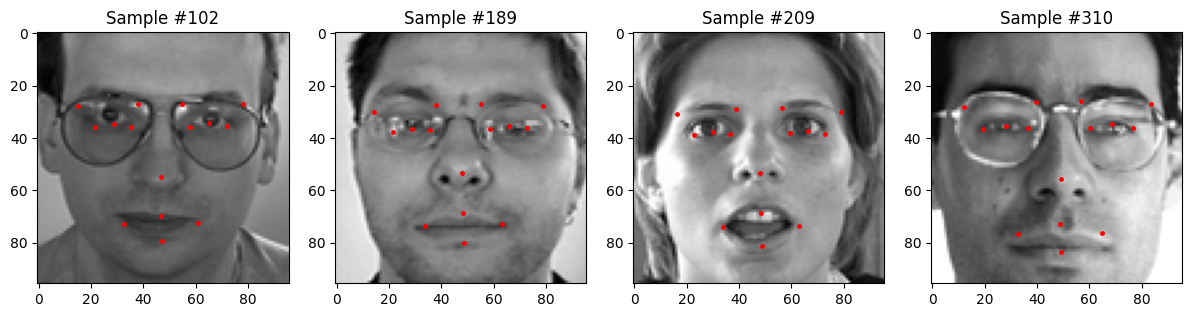

In [208]:
def show_images(df, prediction, indexes, ncols=5, figsize=(15,10), with_keypoints=True):
    plt.figure(figsize=figsize)
    nrows = len(indexes)//ncols + 1
    for i, idx in enumerate(indexes):
        image = np.fromstring(df.loc[idx, 'Image'], sep=' ').astype(np.float32).reshape(-1, IMG_SIZE)
        if with_keypoints:
            keypoints = prediction[idx].reshape(-1,2)
        else:
            keypoints = []
        plt.subplot(nrows, ncols, i+1)
        plt.title(f"Sample #{idx}")
        plt.tight_layout()
        show_keypoints(image, keypoints)
    plt.show()

show_images(test_data, prediction, indexes=[102,189,209,310])